In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/tmp/ipykernel_40410/880010554.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
metric_name = 'VUS_PR'
df = pd.read_csv('merged_scores/merged_scores_{}.csv'.format(metric_name))

FileNotFoundError: [Errno 2] No such file or directory: 'merged_scores/merged_scores_VUS_PR.csv'

In [21]:
probs = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
all_length = [16,32,64,128,256,512,768,1024]

methods_ens = [
    'inception_time_default_{}_score',
    'convnet_default_{}_score',
    'resnet_default_{}_score',
    'sit_conv_patch_{}_score',
    'sit_linear_patch_{}_score',
    'sit_stem_original_{}_score',
    'sit_stem_relu_{}_score',
    'rocket_{}_score',
    'ada_boost_{}_score',
    'knn_{}_score',
    'decision_tree_{}_score',
    'random_forest_{}_score',
    'mlp_{}_score',
    'bayes_{}_score',
    'qda_{}_score',
    'svc_linear_{}_score']

methods_conv = [
    'inception_time_default_{}_score',
    'convnet_default_{}_score',
    'resnet_default_{}_score',]

methods_sit = [
    'sit_conv_patch_{}_score',
    'sit_linear_patch_{}_score',
    'sit_stem_original_{}_score',
    'sit_stem_relu_{}_score',]

methods_ts = ['rocket_{}_score']

methods_classical = [
    'ada_boost_{}_score',
    'knn_{}_score',
    'decision_tree_{}_score',
    'random_forest_{}_score',
    'mlp_{}_score',
    'bayes_{}_score',
    'qda_{}_score',
    'svc_linear_{}_score']

old_method = ['IFOREST', 'LOF', 'MP', 'NORMA', 'IFOREST1', 'HBOS', 'OCSVM',
       'PCA', 'AE', 'CNN', 'LSTM', 'POLY']

In [22]:
#Process GENIE exp



def read_GENIE_values(type_g=''):
    result = None
    for prob in probs:
        df = pd.read_csv('./{}GENIE/{}GENIE-{}/{}.csv'.format(type_g,type_g,prob,metric_name))
        df[['dataset', 'filename']] = df['Unnamed: 0'].str.split('/', 1, expand=True)
        df = df.drop('Unnamed: 0',1)
        if result is None:
            result = df.copy()
            result['GENIE-{}'.format(prob)] = df['{}GENIE-{}'.format(type_g,prob)]  
            if type_g != '':
                result = result.drop('{}GENIE-{}'.format(type_g,prob),1)
            
        else:
            result['GENIE-{}'.format(prob)] = df['{}GENIE-{}'.format(type_g,prob)]   
    return result

df_GENIEs = read_GENIE_values()
df_lucky_GENIEs = read_GENIE_values('LUCKY_')
df_unlucky_GENIEs = read_GENIE_values('UNLUCKY_')
df_best3_GENIEs = read_GENIE_values('BEST-3_')
df_best4_GENIEs = read_GENIE_values('BEST-4_')

df_GENIEs = df_GENIEs.set_index(['filename'])
df_lucky_GENIEs = df_lucky_GENIEs.set_index(['filename'])
df_unlucky_GENIEs = df_unlucky_GENIEs.set_index(['filename'])
df_best3_GENIEs = df_best3_GENIEs.set_index(['filename'])
df_best4_GENIEs = df_best4_GENIEs.set_index(['filename'])

df_GENIEs = df_GENIEs.loc[df['filename']]
df_unlucky_GENIEs = df_unlucky_GENIEs.loc[df['filename']]
df_lucky_GENIEs = df_lucky_GENIEs.loc[df['filename']]
df_best3_GENIEs = df_best3_GENIEs.loc[df['filename']]
df_best4_GENIEs = df_best4_GENIEs.loc[df['filename']]



<ipython-input-22-ccc21ce2e886>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipython-input-22-ccc21ce2e886>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipython-input-22-ccc21ce2e886>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipython-input-22-ccc21ce2e886>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipython-input-22-ccc21ce2e886>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipyt

<ipython-input-22-ccc21ce2e886>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipython-input-22-ccc21ce2e886>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipython-input-22-ccc21ce2e886>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipython-input-22-ccc21ce2e886>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipython-input-22-ccc21ce2e886>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipyt

In [25]:
def plot_genei_acc(df_GENIEs,df_tmp,style='--'):
    real_prob_list = []
    for prob in probs:
        real_prob = float(len(df_tmp.loc[np.isclose(df_tmp['GENIE'].round(6), df_GENIEs['GENIE-{}'.format(int(prob))].round(6))]))/float(len(df_tmp))
        real_prob_list.append(float(prob)/100.0)
    sorted_vals = np.array([[x,y] for x,y in sorted(zip(real_prob_list, df_GENIEs.mean().values))])
    plt.plot(sorted_vals[:,0],sorted_vals[:,1],color='black',linestyle=style)
    return sorted_vals

def generate_Classification_Detection_graph(dataset=None,plot_curve=True):
    
    if dataset is not None:
        df_tmp = df.loc[df['dataset']==dataset]
        df_unlucky_GENIEs_tmp = df_unlucky_GENIEs.loc[df_unlucky_GENIEs['dataset']==dataset]
        df_GENIEs_tmp = df_GENIEs.loc[df_GENIEs['dataset']==dataset]
        df_lucky_GENIEs_tmp = df_lucky_GENIEs.loc[df_lucky_GENIEs['dataset']==dataset]
        df_best3_GENIEs_tmp = df_best3_GENIEs.loc[df_best3_GENIEs['dataset']==dataset]
        df_best4_GENIEs_tmp = df_best4_GENIEs.loc[df_best4_GENIEs['dataset']==dataset]
    else:
        df_tmp = df
        df_unlucky_GENIEs_tmp = df_unlucky_GENIEs
        df_GENIEs_tmp = df_GENIEs
        df_lucky_GENIEs_tmp = df_lucky_GENIEs
        df_best3_GENIEs_tmp = df_best3_GENIEs
        df_best4_GENIEs_tmp = df_best4_GENIEs
    
    results,results_color,results_shape,results_name_leg = {},{},{},{}
    for length in all_length:
        methods = [method.format(length) for method in methods_ens]
        tmp =  []
        colors = []
        shapes = []
        names_leg = []
        for method in methods:
            tmp.append([float(len(df_tmp.loc[df_tmp[method.replace('_score','_class')]==df_tmp['label']]))/float(len(df_tmp)),np.mean(df_tmp[method].values)])
            if method in [method.format(length) for method in methods_classical]: 
                colors.append('green')
                shapes.append('^')
                names_leg.append('Feature-based')
            elif method in [method.format(length) for method in methods_sit]: 
                colors.append('red')
                shapes.append('s')
                names_leg.append('Transformer-based')
            elif method in [method.format(length) for method in methods_conv]: 
                colors.append('blue')
                shapes.append('o')
                names_leg.append('Convolutional-based')
            elif method in [method.format(length) for method in methods_ts]: 
                colors.append('black')
                shapes.append('x')
                names_leg.append('Rocket')
        results[length] = np.array(tmp)
        results_color[length] = colors 
        results_shape[length] = shapes 
        results_name_leg[length] = names_leg 
    
    label_done = []
    for length in all_length:
        for val_x,val_y,color,shape,name in zip(results[length][:,0],results[length][:,1],results_color[length],results_shape[length],results_name_leg[length]):
            if name in label_done:
                plt.scatter(val_x,val_y,facecolors=color,edgecolors='black',s=100,marker=shape)
            else:
                label_done.append(name)
                plt.scatter(val_x,val_y,facecolors=color,edgecolors='black',s=100,marker=shape,label=name)
            
    plt.xlabel('Classification accuracy')
    plt.ylabel('Anomaly Detection {}'.format(metric_name))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()
    plt.axhline(df_tmp[old_method].mean().max(),c='red',linestyle='--')
    idx = np.argwhere(np.diff(np.sign(np.array([df_tmp[old_method].mean().max() for i in range(len(df_unlucky_GENIEs_tmp.mean().values))]) - df_unlucky_GENIEs_tmp.mean().values))).flatten()
    if not(plot_curve and (len(idx) > 0)):
        plt.axhline(df_tmp['GENIE'].mean(),c='black',linestyle='-')
        plt.axhline(df_unlucky_GENIEs_tmp['GENIE-0'].mean(),c='black',linestyle='-')
        plt.ylim(df_unlucky_GENIEs_tmp['GENIE-0'].mean()-0.1,df_tmp['GENIE'].mean()+0.1)
    if plot_curve:
        _ = plot_genei_acc(df_GENIEs_tmp,df_tmp,style='-')
        sorted_vals_luck = plot_genei_acc(df_lucky_GENIEs_tmp,df_tmp)
        sorted_vals_unluck = plot_genei_acc(df_unlucky_GENIEs_tmp,df_tmp)
        _ = plot_genei_acc(df_best3_GENIEs_tmp,df_tmp,style='dotted')
        _ = plot_genei_acc(df_best4_GENIEs_tmp,df_tmp,style='dotted')

        
        probfill = np.sort(np.concatenate([sorted_vals_luck[:,0], sorted_vals_unluck[:,0]]))
        y1fill = np.interp(probfill, sorted_vals_luck[:,0], sorted_vals_luck[:,1])
        y2fill = np.interp(probfill, sorted_vals_unluck[:,0], sorted_vals_unluck[:,1])
        plt.fill_between(probfill, y2fill, y1fill, where=y2fill < y1fill, interpolate=True, color='grey', alpha=0.2)



<ipython-input-25-8b31cfa2b361>:64: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(val_x,val_y,facecolors=color,edgecolors='black',s=100,marker=shape,label=name)
<ipython-input-25-8b31cfa2b361>:61: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(val_x,val_y,facecolors=color,edgecolors='black',s=100,marker=shape)
<ipython-input-25-8b31cfa2b361>:72: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  idx = np.argwhere(np.diff(np.sign(np.array([df_tmp[old_method].mean().max() for i in range(len(df_unlucky_GENIEs_tm

(0.0, 0.5)

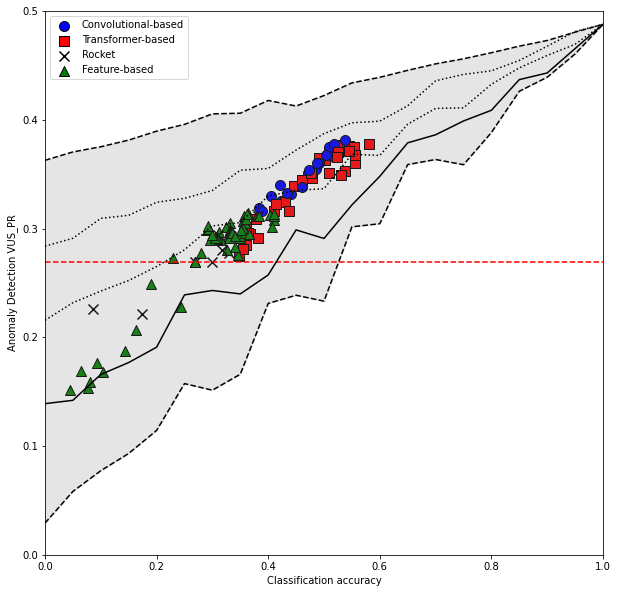

In [26]:
plt.figure(figsize=(10,10))
generate_Classification_Detection_graph(dataset=None,plot_curve=True)
plt.ylim(0,0.5)

<ipython-input-25-8b31cfa2b361>:64: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(val_x,val_y,facecolors=color,edgecolors='black',s=100,marker=shape,label=name)
<ipython-input-25-8b31cfa2b361>:61: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(val_x,val_y,facecolors=color,edgecolors='black',s=100,marker=shape)
<ipython-input-25-8b31cfa2b361>:72: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  idx = np.argwhere(np.diff(np.sign(np.array([df_tmp[old_method].mean().max() for i in range(len(df_unlucky_GENIEs_tm

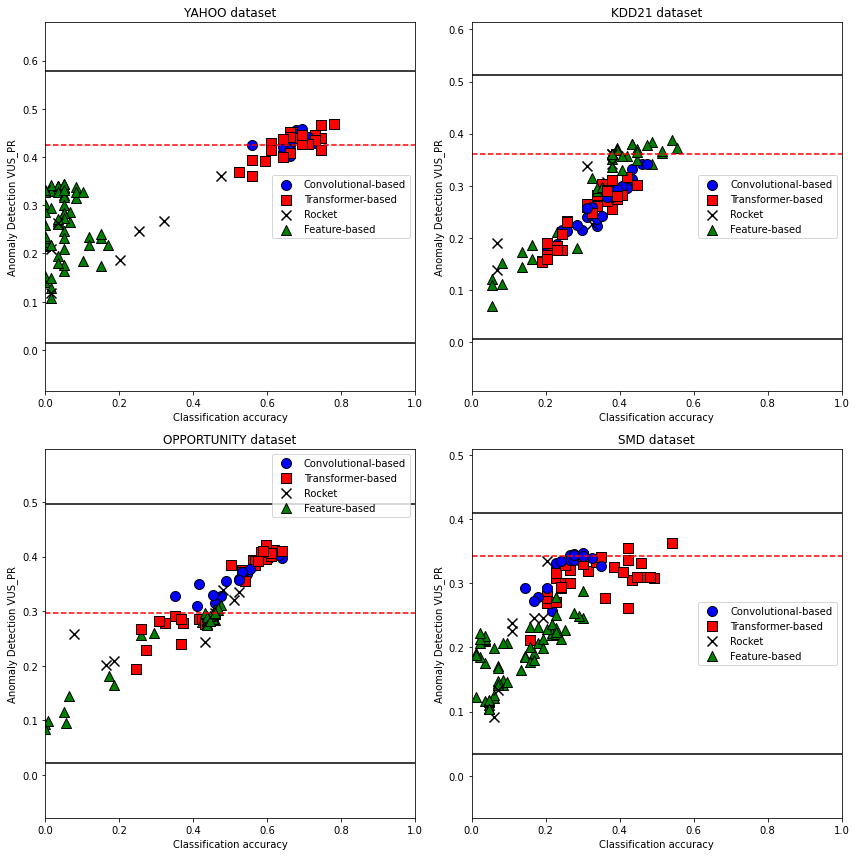

In [27]:
plt.figure(figsize=(12,12))
for i,dataset in enumerate(['YAHOO','KDD21','OPPORTUNITY','SMD']):#,'GHL','SVDB']):
    plt.subplot(2,2,i+1)
    generate_Classification_Detection_graph(dataset=dataset,plot_curve=False)
    plt.title("{} dataset".format(dataset))
    plt.tight_layout()